In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import keras.api._v2.keras as keras
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Replace 'path/to/your/file.csv' with the actual path to your CSV file
csv_file_path = '/content/drive/MyDrive/mnist_train.csv'

# Read data from CSV file into a pandas DataFrame
# Assuming the first column is the label column
df = pd.read_csv(csv_file_path, header=None)

# Split the data into features (X) and labels (y)
X = df.iloc[:, 1:]  # Features (all columns except the first one)
y = df.iloc[:, 0]   # Labels (the first column)

# Reshape the features to 28x28 images
X = X.values.reshape(-1, 28, 28, 1)

# Standardize pixel values
scaler = StandardScaler()
X = scaler.fit_transform(X.reshape(-1, 784)).reshape(-1, 28, 28, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the modified AlexNet architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),  # Global average pooling instead of fully connected layers
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  # Assuming 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')



Epoch 1/10
300/300 [==============================] - 304s 1s/step - loss: 0.8802 - accuracy: 0.6621 - val_loss: 0.2123 - val_accuracy: 0.9434
Epoch 2/10
300/300 [==============================] - 302s 1s/step - loss: 0.1766 - accuracy: 0.9536 - val_loss: 0.1469 - val_accuracy: 0.9610
Epoch 3/10
300/300 [==============================] - 304s 1s/step - loss: 0.1287 - accuracy: 0.9653 - val_loss: 0.1456 - val_accuracy: 0.9682
Epoch 4/10
300/300 [==============================] - 304s 1s/step - loss: 0.1116 - accuracy: 0.9698 - val_loss: 0.1519 - val_accuracy: 0.9639
Epoch 5/10
300/300 [==============================] - 304s 1s/step - loss: 0.0943 - accuracy: 0.9755 - val_loss: 0.1240 - val_accuracy: 0.9677
Epoch 6/10
300/300 [==============================] - 305s 1s/step - loss: 0.0771 - accuracy: 0.9797 - val_loss: 0.1219 - val_accuracy: 0.9725
Epoch 7/10
300/300 [==============================] - 304s 1s/step - loss: 0.0746 - accuracy: 0.9807 - val_loss: 0.1144 - val_accuracy: 0.9722

In [ ]:
from keras.models import load_model

# Save the model to a file
model.save('/content/drive/MyDrive/Colab Notebooks/Alexnet_model.h5')
print("Model saved successfully.")




/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully.


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 5, 5, 96)          11712     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 96)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 2, 2, 256)         614656    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 1, 1, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 1, 1, 384)         885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 384)        

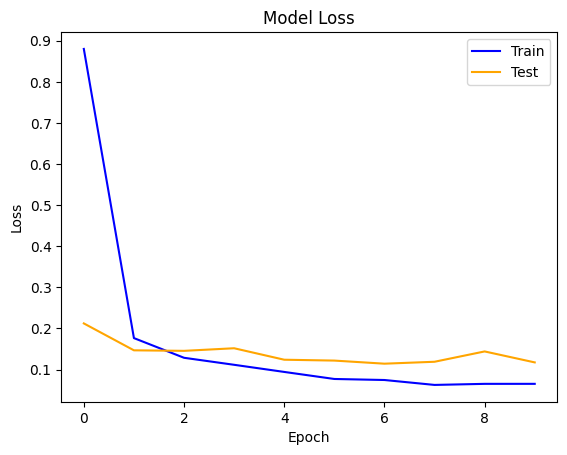

In [ ]:
import matplotlib.pyplot as plt
# Plot diagnostic learning curves
plt.title('Model Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc ="upper right")

In [ ]:
import numpy as np
y_test=np.array(y_test)
# a) Predictions on validation data
num_samples_to_display = 10
random_indices = np.random.choice(len(X_test), num_samples_to_display)

for idx in random_indices:
    sample_image = X_test[idx].reshape(28, 28)
    sample_label = np.argmax(y_test[idx])
    predicted_label = np.argmax(model.predict(np.expand_dims(X_test[idx], axis=0)))

    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Actual: {sample_label}, Predicted: {predicted_label}")
    plt.show()

1/1 [==============================] - 0s 120ms/step


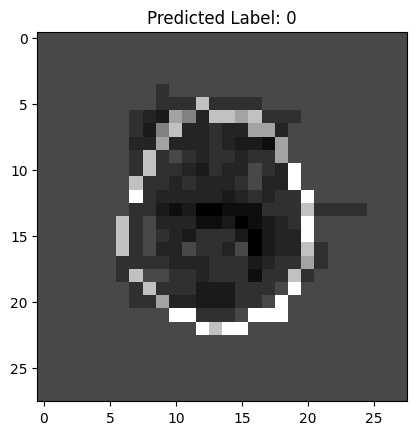

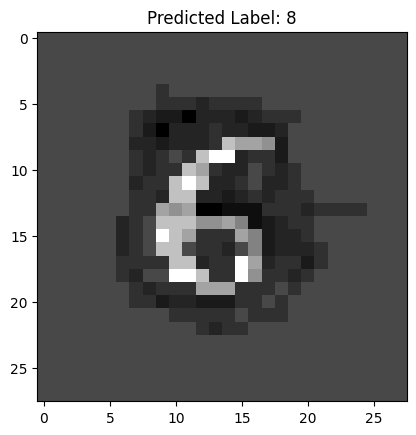

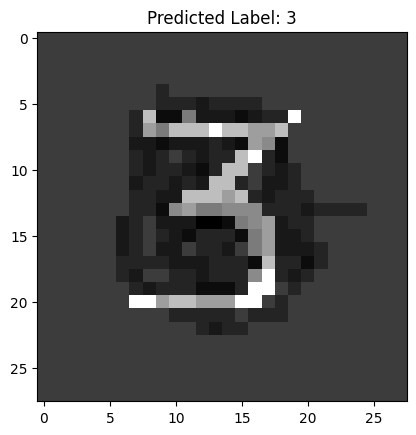

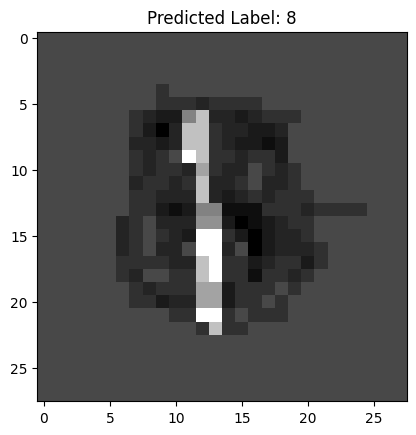

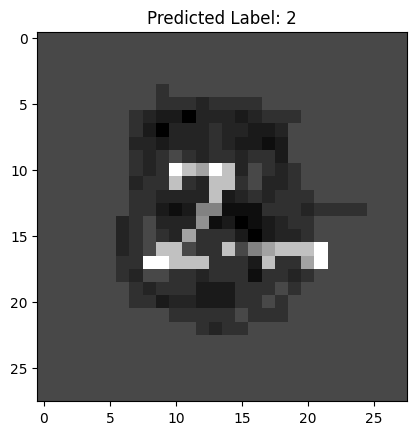

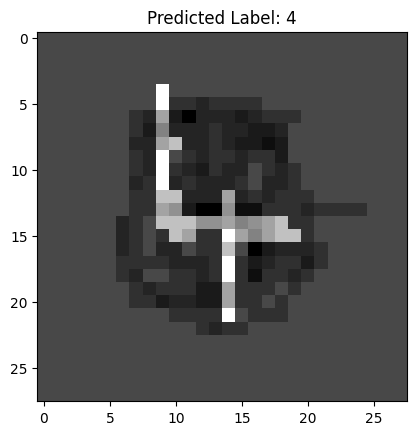

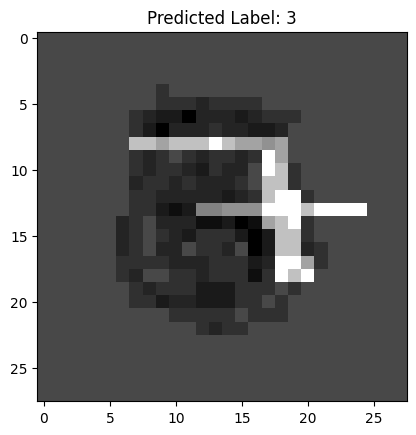

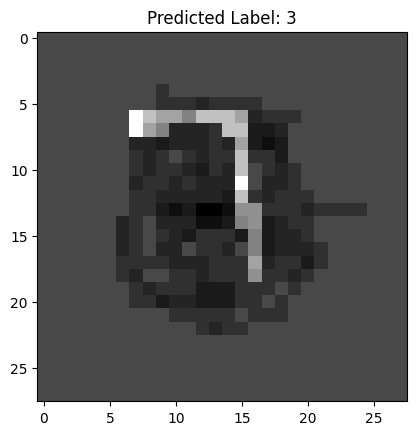

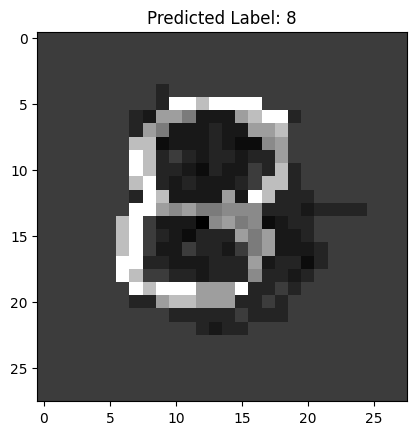

In [ ]:
import pandas as pd
import numpy as np
import cv2
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
from matplotlib import pyplot as plt

# Replace 'path/to/your/test_file.csv' with the actual path to your test CSV file
test_csv_file_path = '/content/drive/MyDrive/Colab Notebooks/test/output_data.csv'

# Load the saved VGG model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Alexnet_model.h5')

# Read data from the test CSV file into a pandas DataFrame
test_df = pd.read_csv(test_csv_file_path, header=None)

# Split the test data into features (X_test)
X_test = test_df.iloc[:, :]  # Features (all columns except the first one)

# Reshape the features to 28x28 images
X_test_images = X_test.values.reshape(-1, 28, 28, 1)

# Standardize pixel values using the same scaler as the training data
X_test_images = StandardScaler().fit_transform(X_test_images.reshape(-1, 784)).reshape(-1, 28, 28, 1)

# Make predictions on the test set using the loaded model
predictions = model.predict(X_test_images)

# Assuming you want the class with the highest probability as the predicted label
predicted_labels = np.argmax(predictions, axis=1)

# Loop through each image and its predicted label
for i in range(len(X_test_images)):
    # Display the image and its predicted label
    plt.imshow(X_test_images[i, :, :, 0], cmap='gray')
    plt.title(f'Predicted Label: {predicted_labels[i]}')
    plt.show()
